## Fully functioning CNN for classification using CIFAR-10 dataset

In [1]:
# importing dependencies
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


In [2]:
# importing the dataset and loading the data
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
X = np.append(X_train,X_test,axis=0)
Y = np.append(y_train,y_test,axis=0)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 8)
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [5]:
print(type(X_train),type(y_train))
print(type(X_test),type(y_test))
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(42000, 32, 32, 3) (42000,)
(18000, 32, 32, 3) (18000,)


In [6]:
# normalise th input from 0 - 255 to between 0 and 1 by dividing it by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]
# 10

In [8]:
def loss_plot(History,epochs):
  N = np.arange(0, epochs)
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(N, History.history["loss"], label="train_loss")
  plt.plot(N, History.history["val_loss"], label="val_loss")
  plt.title("Training Loss vs epoch")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")
  plt.legend(loc="upper right")


In [9]:
def accuracy_plot(History,epochs):
  N = np.arange(0, epochs)
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(N, History.history["accuracy"], label="train_accuracy")
  plt.plot(N, History.history["val_accuracy"], label="val_accuracy")
  plt.title("Accuracy vs epoch")
  plt.xlabel("Epoch #")
  plt.ylabel("accuracy")
  plt.legend(loc="upper right")

In [10]:
epochs = 100

## Variation 1

In [11]:
#designing the model
model1 = Sequential()

In [12]:
# add convlution layer
model1.add(Conv2D(32,(3,3), input_shape = X_train.shape[1:], activation = 'relu', padding = 'same'))
# dropout a layer
model1.add(Dropout(0.2))
# add pooling layer
# pooling layer helps make the classifier more robust
model1.add(MaxPooling2D(pool_size = (2,2)))
# dropout a layer
model1.add(Dropout(0.2))
# adding batch normalisation
# model.add(BatchNormalization())

In [13]:
# adding one more convlution layer
# but the filter size is increased so that network can learn more complex features
model1.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
# add pooling layer
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.2))
# model.add(BatchNormalization())


In [14]:
model1.add(Flatten())
model1.add(Dropout(0.2))

In [15]:
# add dense layer NN
model1.add(Dense(64, kernel_constraint=maxnorm(3), activation = 'relu'))
model1.add(Dropout(0.2))
# in this dense layer classes fill the number of classes a sthe number of neurons
model1.add(Dense(class_num))
# softmax activation function selects the neuron with highest probability votinh that 
# the image belongs to that class
model1.add(Activation('softmax'))

In [16]:
# epochs = 100
# optimizer = keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.0, nesterov = False)
optimizer = 'SGD'

In [17]:
model1.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [18]:
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0

In [19]:
# numpy.random.seed(seed)
history1 = model1.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=epochs, batch_size=64)

Epoch 1/100
657/657 [==============================] - 38s 13ms/step - loss: 2.2555 - accuracy: 0.1467 - val_loss: 2.0411 - val_accuracy: 0.2782
Epoch 2/100
657/657 [==============================] - 7s 11ms/step - loss: 1.9969 - accuracy: 0.2736 - val_loss: 1.9219 - val_accuracy: 0.3398
Epoch 3/100
657/657 [==============================] - 7s 11ms/step - loss: 1.8688 - accuracy: 0.3325 - val_loss: 1.7912 - val_accuracy: 0.3836
Epoch 4/100
657/657 [==============================] - 7s 11ms/step - loss: 1.7509 - accuracy: 0.3741 - val_loss: 1.7647 - val_accuracy: 0.3755
Epoch 5/100
657/657 [==============================] - 7s 10ms/step - loss: 1.6617 - accuracy: 0.4003 - val_loss: 1.6414 - val_accuracy: 0.4233
Epoch 6/100
657/657 [==============================] - 7s 10ms/step - loss: 1.5749 - accuracy: 0.4356 - val_loss: 1.5239 - val_accuracy: 0.4714
Epoch 7/100
657/657 [==============================] - 7s 10ms/step - loss: 1.5300 - accuracy: 0.4499 - val_loss: 1.4643 - val_accuracy

In [20]:
scores1 = model1.evaluate(X_test,y_test,verbose=0)
print("Accuracy: ",scores1[1]*100)

Accuracy:  72.64444231987


In [21]:
scores = model1.evaluate(X_train,y_train,verbose=0)
print("Accuracy: ",scores[1]*100)

Accuracy:  84.4261884689331


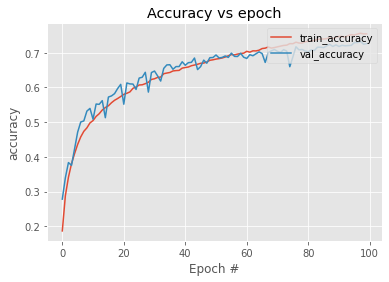

In [22]:
accuracy_plot(history1, epochs)

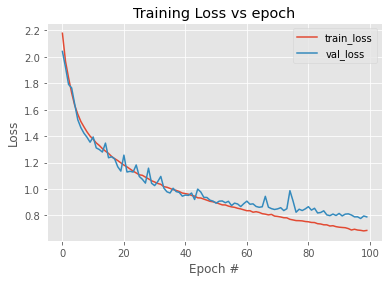

In [23]:
loss_plot(history1, epochs)

 ## variation 2

In [24]:
#designing the model
model2 = Sequential()
# block 1
model2.add(Conv2D(32,(3,3), input_shape = X_train.shape[1:], activation = 'relu', padding = 'same'))
# model.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.2))

# block 2
model2.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.2))

# flatten the data to put into dense layers
model2.add(Flatten())
# model.add(Dropout(0.2))

# add dense layer
model2.add(Dense(64, kernel_constraint=maxnorm(3), activation = 'relu'))
# model.add(Dropout(0.2))

model2.add(Dense(class_num))
model2.add(Activation('softmax'))

# epochs = 100
optimizer = 'SGD'

model2.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
print(model2.summary())
history2 = model2.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=epochs, batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [25]:
scores2 = model2.evaluate(X_test,y_test,verbose=0)
print("Accuracy: ",scores2[1]*100)

Accuracy:  84.4261884689331


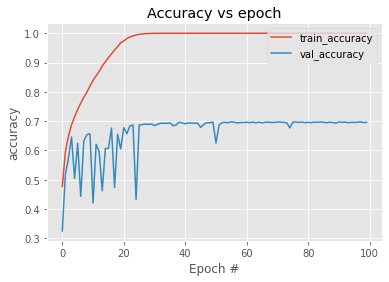

In [26]:
accuracy_plot(history2, epochs)

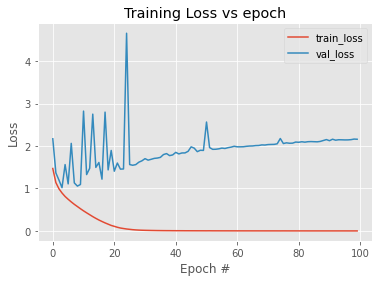

In [27]:
loss_plot(history2, epochs)

## variation 3

In [28]:
#designing the model
model3 = Sequential()
# block 1
model3.add(Conv2D(32,(3,3), input_shape = X_train.shape[1:], activation = 'relu', padding = 'same'))
# model.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout(0.2))

# block 2
model3.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout(0.2))

# block 3
model3.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout(0.2))

# flatten the data to put into dense layers
model3.add(Flatten())
model3.add(Dropout(0.2))

# add dense layer
model3.add(Dense(64, kernel_constraint=maxnorm(3), activation = 'relu'))
model3.add(Dropout(0.2))

model3.add(Dense(class_num))
model3.add(Activation('softmax'))

# epochs = 100
optimizer = 'SGD'

model3.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
print(model3.summary())
history3 = model3.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=epochs, batch_size=64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

In [29]:
scores3 = model3.evaluate(X_test,y_test,verbose=0)
print("Accuracy: ",scores3[1]*100)

Accuracy:  84.4261884689331


In [32]:
scores3 = model3.evaluate(X_train,y_train,verbose=0)
print("Accuracy: ",scores3[1]*100)

Accuracy:  72.01428413391113


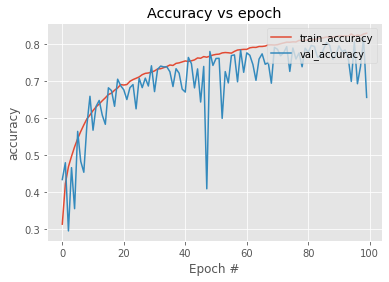

In [34]:
accuracy_plot(history3, epochs)

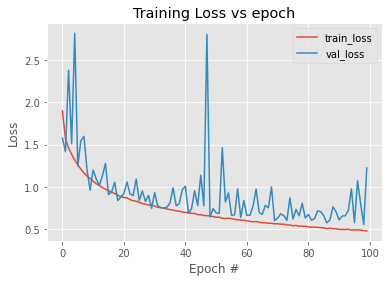

In [35]:
loss_plot(history3, epochs)